In [8]:
import numpy as np
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Descriptors 
from sklearn.manifold import TSNE
import selfies as sf
from DataProc import *

In [9]:
data_art = DataAnalyser('d2', 'artificial')
data_org = DataAnalyser('d2', 'klek_balanced')

art_df = data_art()
org_df = data_org()
org_df = org_df[org_df["Class"] == 1]
org_df = org_df.sample(n=500).drop(['Class', 'Ki'], axis=1)

art_df['Class'] = 'Artificial'
org_df['Class'] = 'Original'

combined_df = pd.concat([art_df, org_df], axis=0)
combined_df = combined_df.reset_index()
print(combined_df.head(), len(combined_df))

   index                                SMILES   
0      0             O=C/C=C/C=CN(CCCC)CCC1CC1  \
1      1      CCC1=CC=CC=C1CCCN(CCCC2)CC2CCCCC   
2      2       C=CC=C(CCCN(CCCC)C=CCCCC)C1C=C1   
3      3            CC=CN=C(CC)CCCCCCCCC1=C=C1   
4      4  FC=CC=C(CCCC(CCCC)CCCCCCCC)CCCCC1CC1   

                                                 fps       Class  
0  [0, 125, 188, 227, 296, 297, 340, 343, 361, 38...  Artificial  
1  [0, 296, 297, 340, 343, 345, 353, 361, 381, 43...  Artificial  
2  [0, 125, 137, 296, 337, 340, 343, 361, 381, 46...  Artificial  
3  [125, 296, 340, 343, 345, 346, 347, 465, 668, ...  Artificial  
4  [0, 125, 227, 296, 297, 340, 343, 345, 346, 34...  Artificial   1000


In [10]:
fp_list = []
for i, row in combined_df.iterrows():
    line = row['fps'].strip('[').strip(']').split(",")
    line = [int(x) for x in line]
    vec = np.zeros(4860, dtype='int')
    for fp in line:
        vec[fp] = 1
    fp_list.append(vec)

In [11]:
array = np.array(fp_list)
tsne = TSNE()
tsne_results = tsne.fit_transform(array)
tsne_dict = {"X": tsne_results[:,0], "Y": tsne_results[:,1]}
tsne_df = pd.DataFrame(tsne_dict)
print(tsne_df.head(), len(tsne_df))

           X          Y
0  -0.152617 -14.252079
1  10.588883 -14.387411
2   1.024137 -13.325205
3 -23.426908  17.027868
4 -60.809681  13.467959 1000


In [12]:
combined_df = combined_df.reset_index()

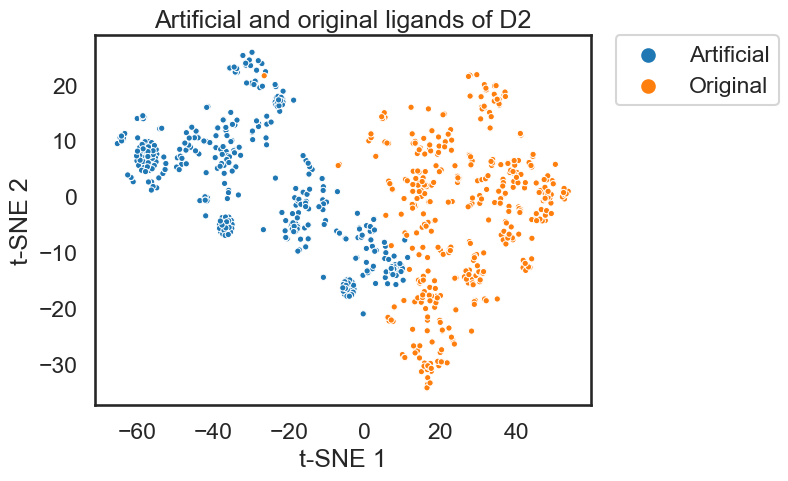

In [13]:
plot_TSNE(combined_df, title="Artificial and original ligands of D2", save_path=f"./artificial/d2-TSNE.png", save=False)

                                 SMILES   
0             O=C/C=C/C=CN(CCCC)CCC1CC1  \
1      CCC1=CC=CC=C1CCCN(CCCC2)CC2CCCCC   
2       C=CC=C(CCCN(CCCC)C=CCCCC)C1C=C1   
3            CC=CN=C(CC)CCCCCCCCC1=C=C1   
4  FC=CC=C(CCCC(CCCC)CCCCCCCC)CCCCC1CC1   

                                                 fps  Molecular weight   
0  [0, 125, 188, 227, 296, 297, 340, 343, 361, 38...           221.344  \
1  [0, 296, 297, 340, 343, 345, 353, 361, 381, 43...           315.545   
2  [0, 125, 137, 296, 337, 340, 343, 361, 381, 46...           287.491   
3  [125, 296, 340, 343, 345, 346, 347, 465, 668, ...           245.410   
4  [0, 125, 227, 296, 297, 340, 343, 345, 346, 34...           392.687   

      LogP  Number of HBD  Number of HBA  Number of heteroatoms   TPSA   
0   3.1574            0.0            2.0                    2.0  20.31  \
1   5.8640            0.0            1.0                    1.0   3.24   
2   5.8710            0.0            1.0                    1.0   3.24   


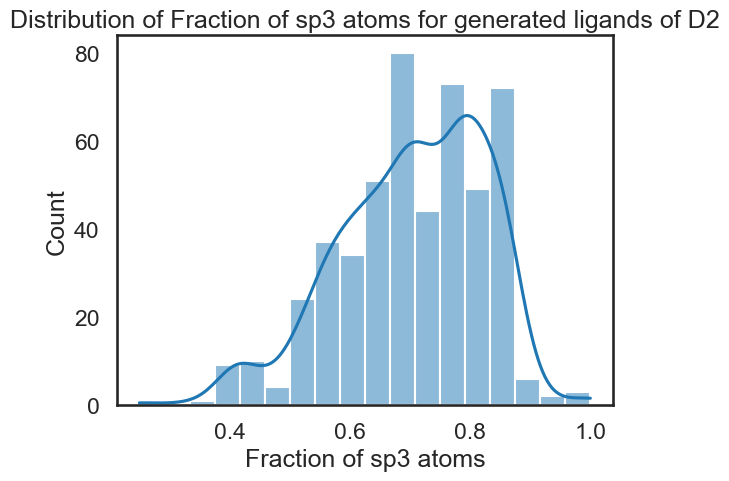

In [14]:
data = DataAnalyser('d2', 'artificial')
data.add_properties()
print(data.df.head())
data.plot_distribution("Fraction of sp3 atoms", save=False)

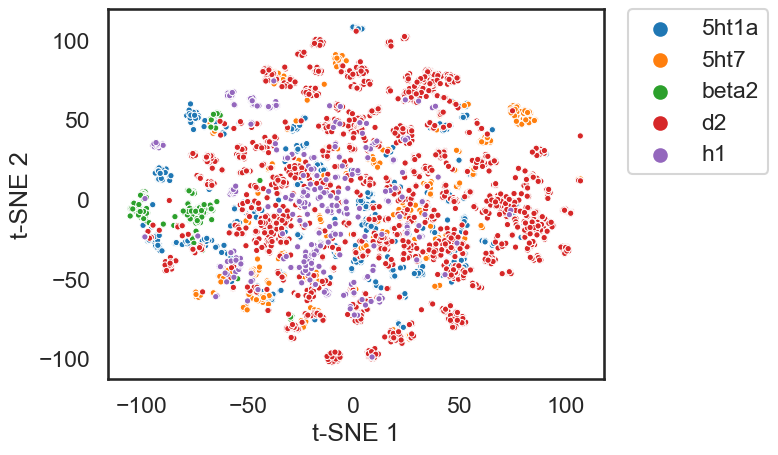

In [15]:
data = DataAnalyser('5ht1a', 'klek_balanced')
data.TSNE_all(title="", save_path = './t-SNE/Proteins_all_TSNE.png', save=False)

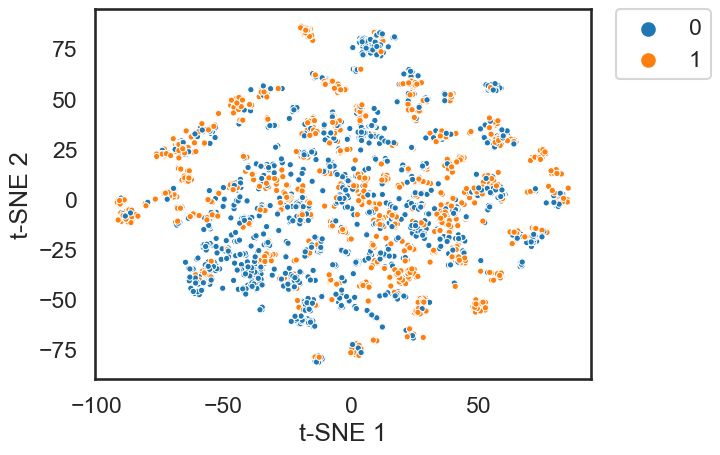

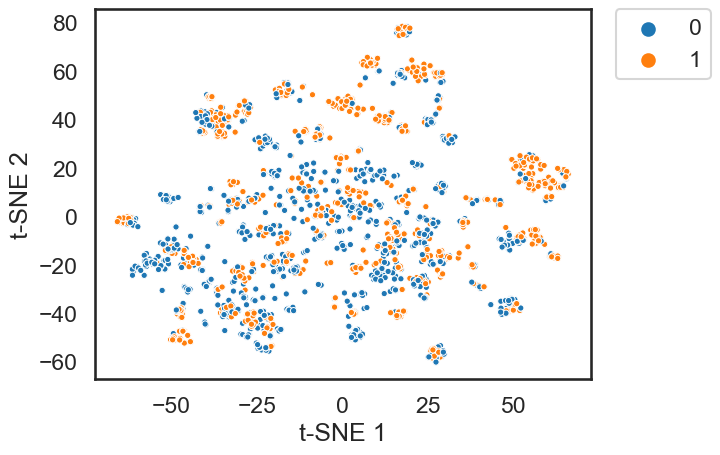

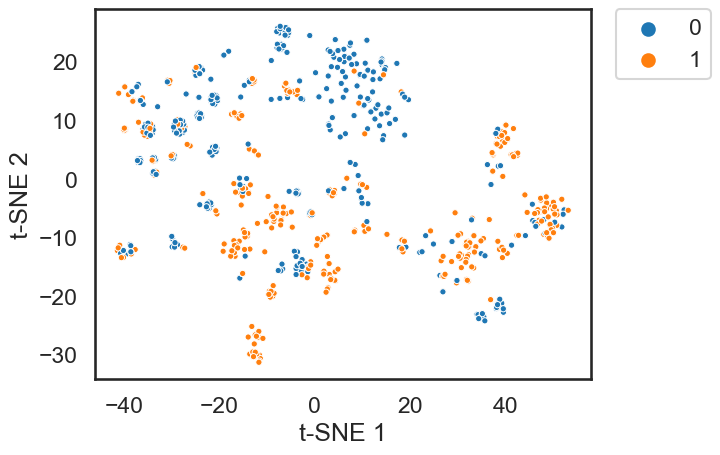

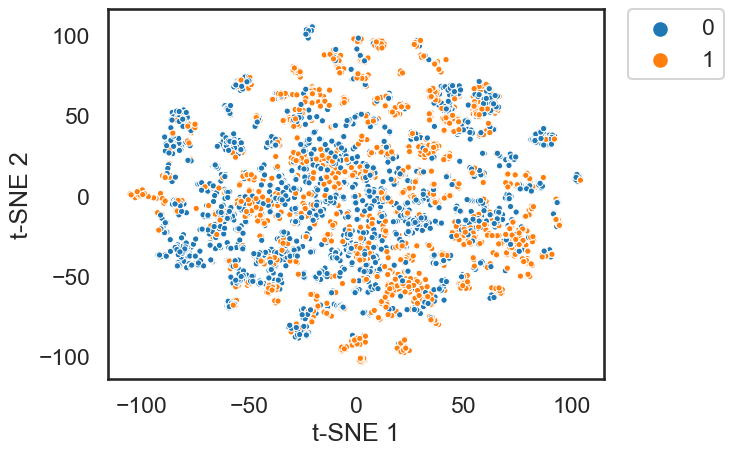

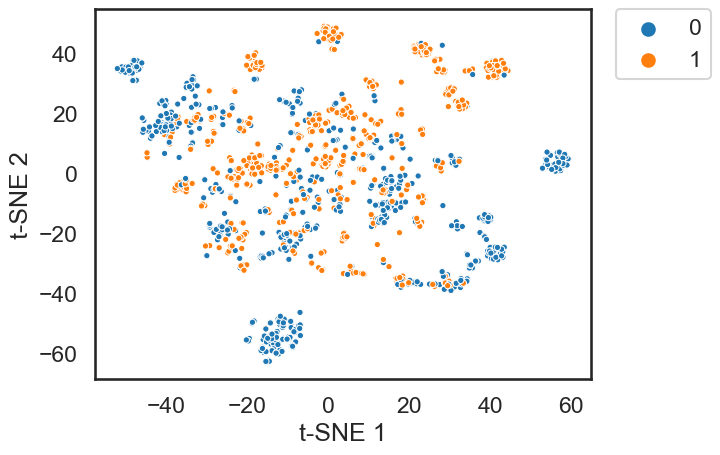

In [17]:
for protein in ['5ht1a', '5ht7', 'beta2', 'd2', 'h1']:
    data = DataAnalyser(protein, 'klek_balanced')
    plot_TSNE(data.df, save=False)

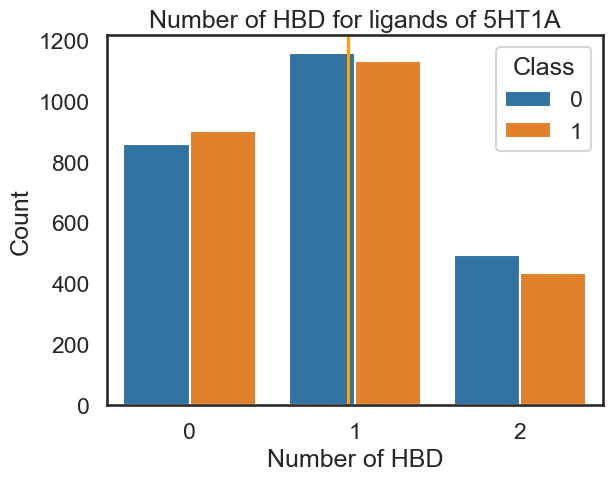

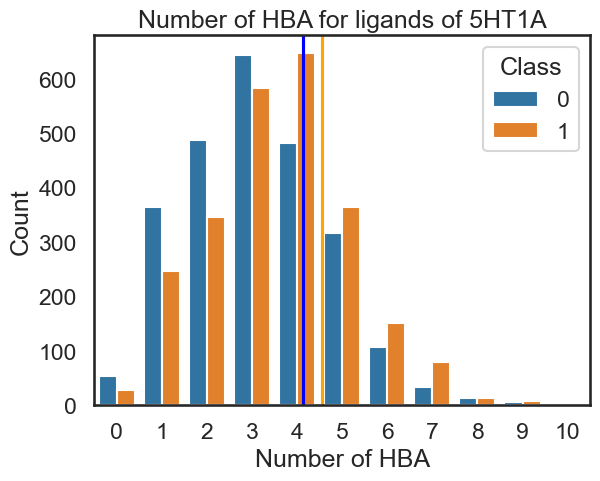

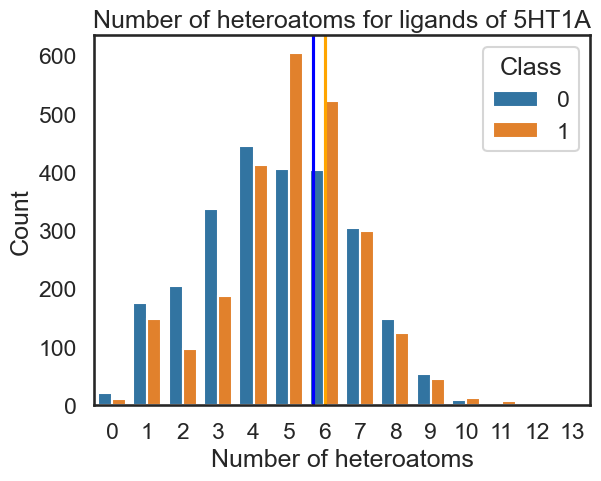

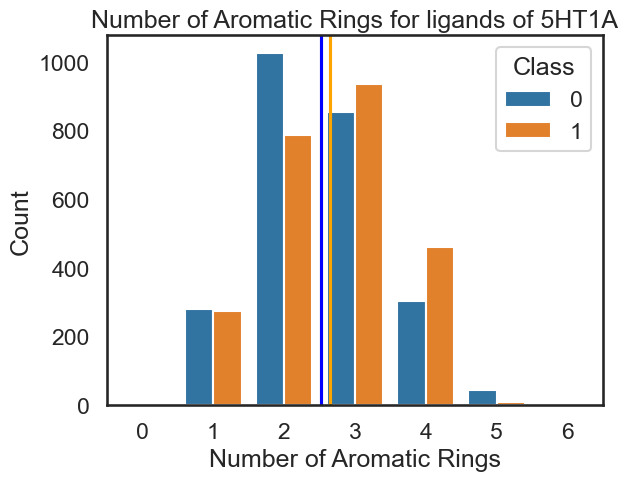

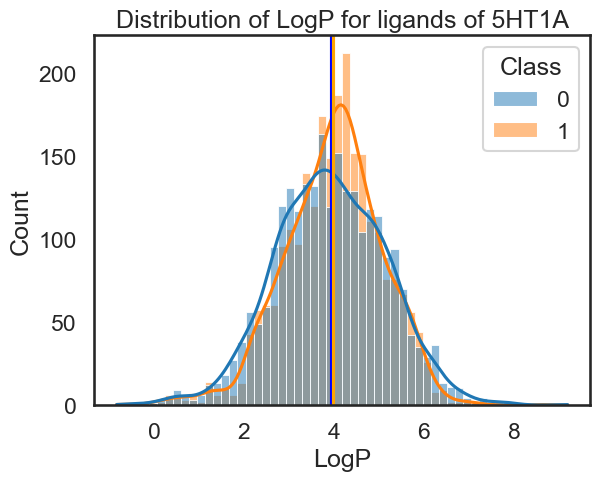

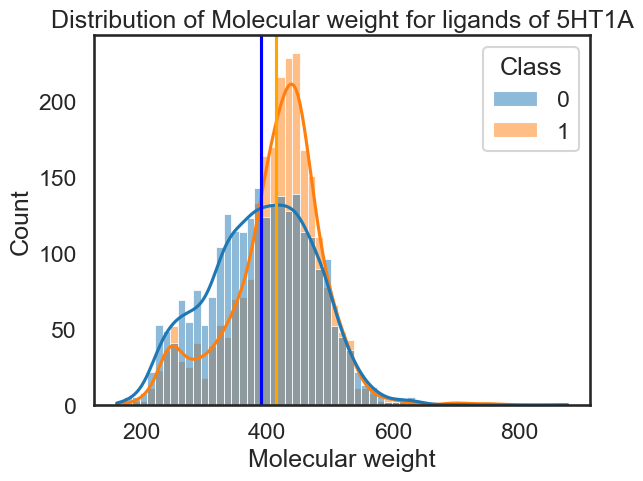

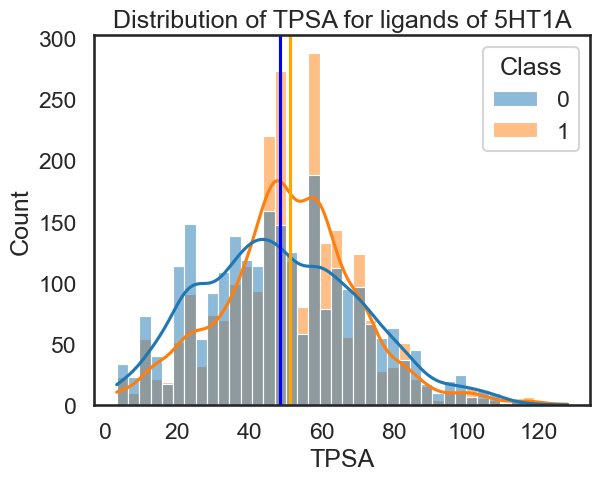

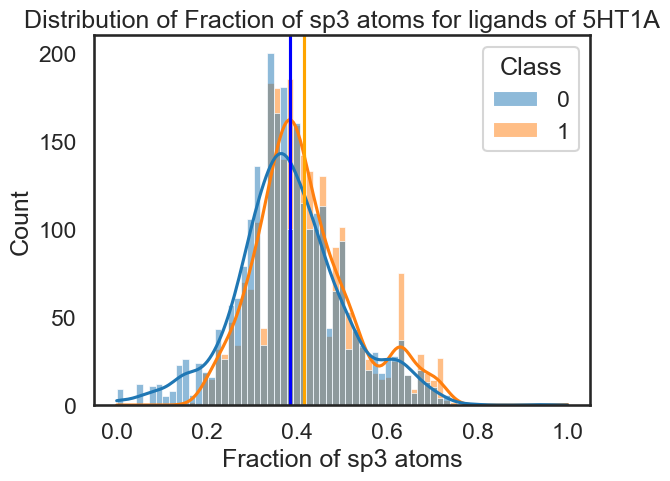

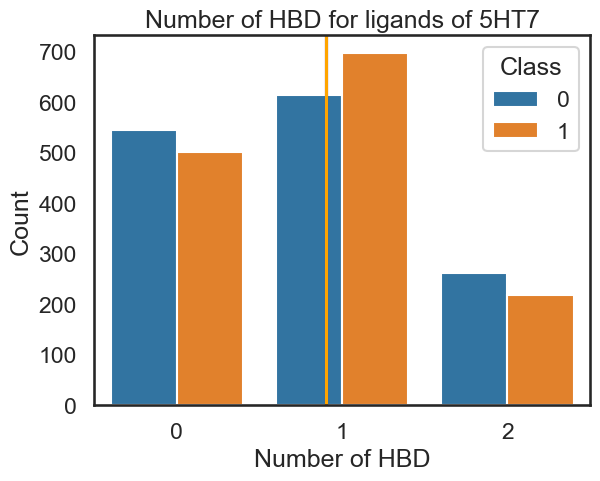

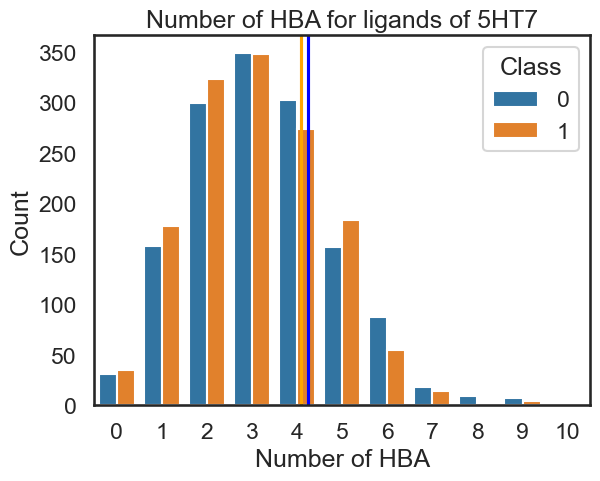

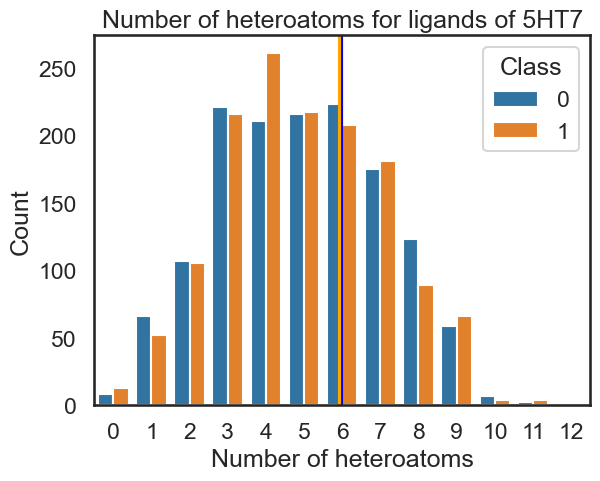

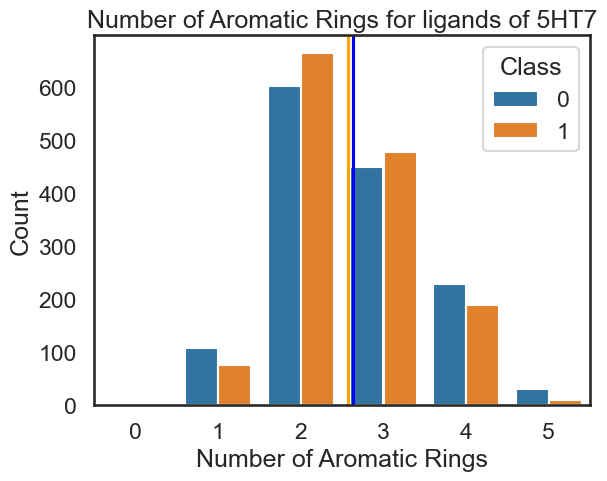

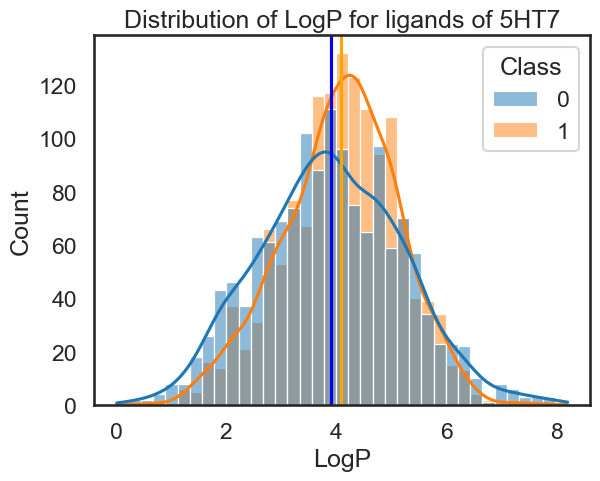

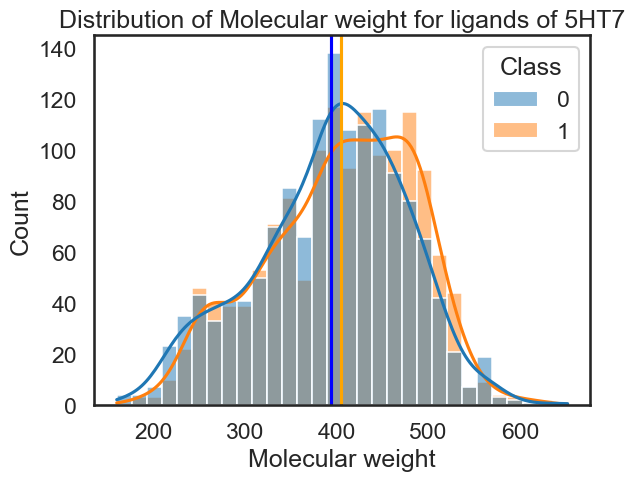

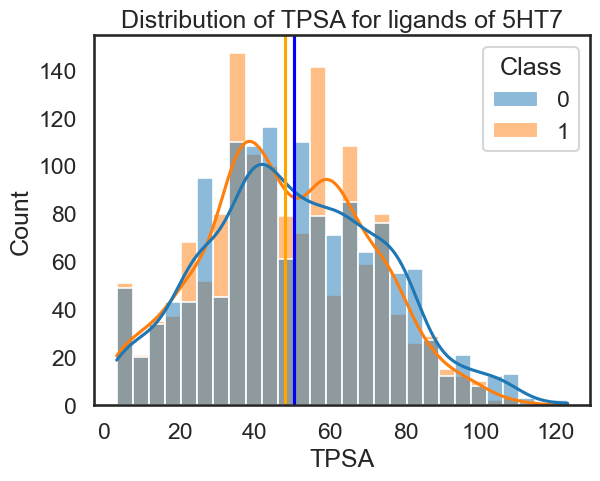

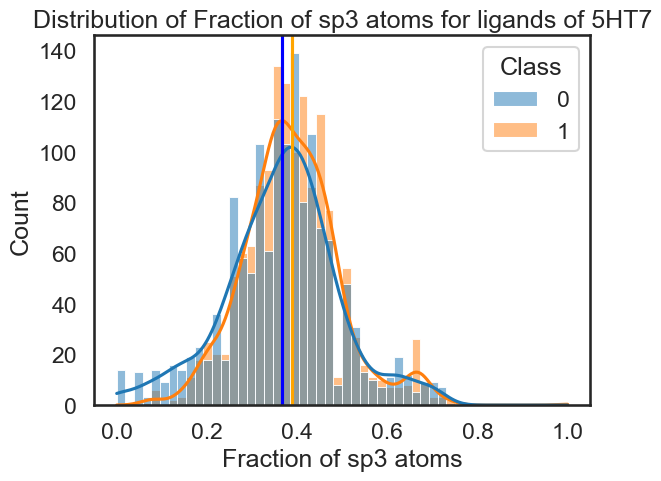

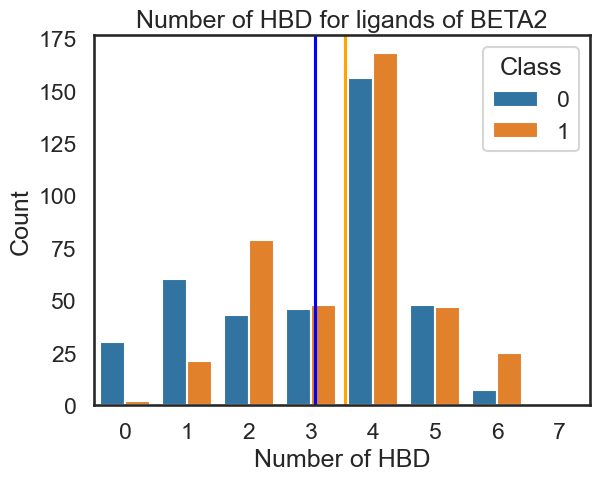

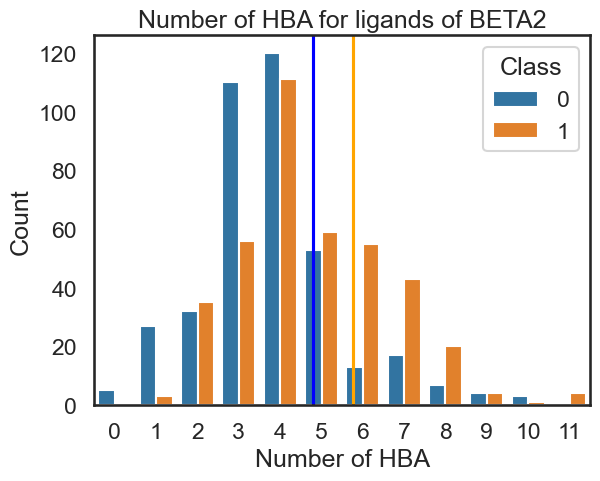

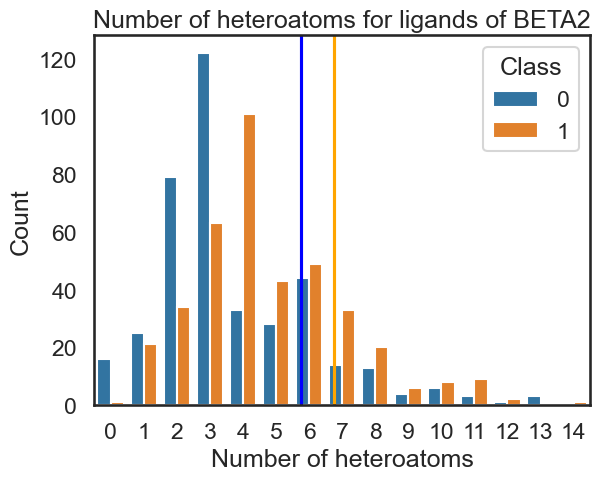

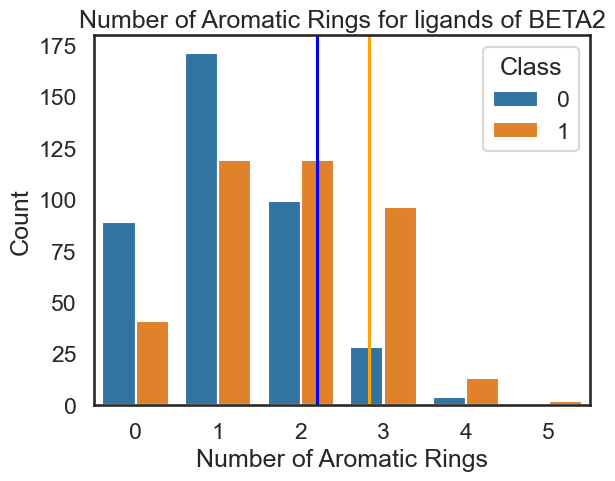

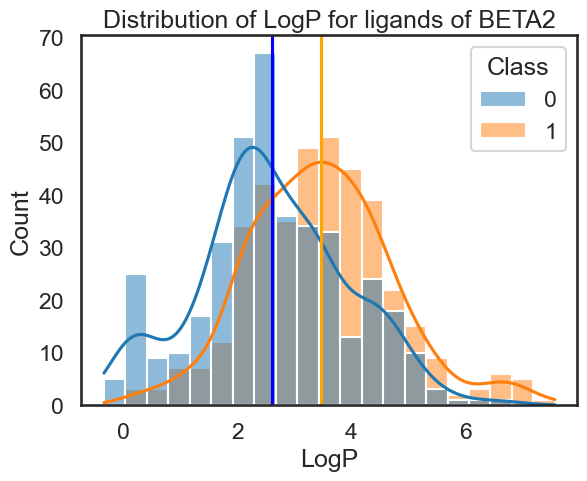

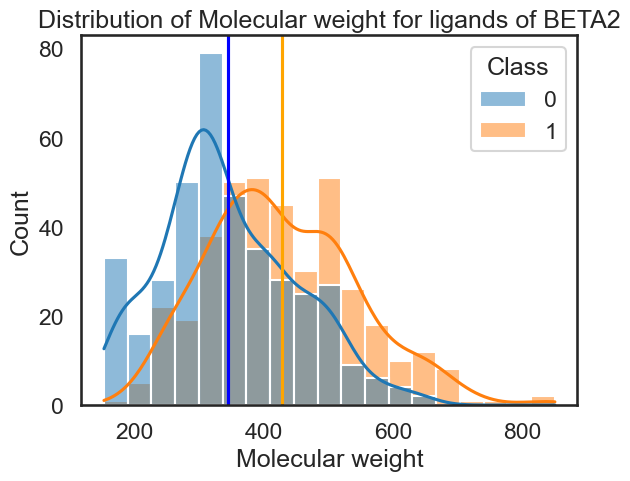

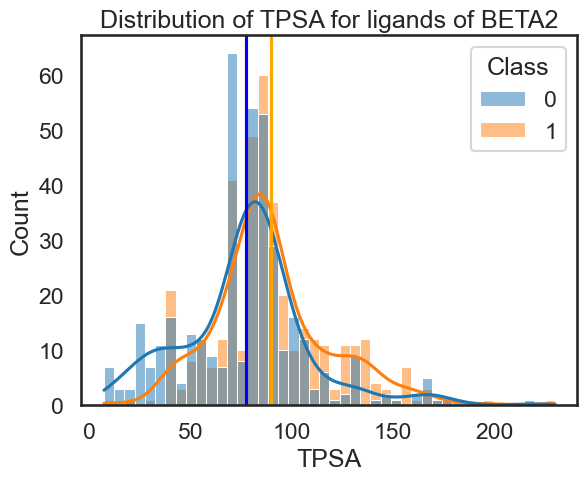

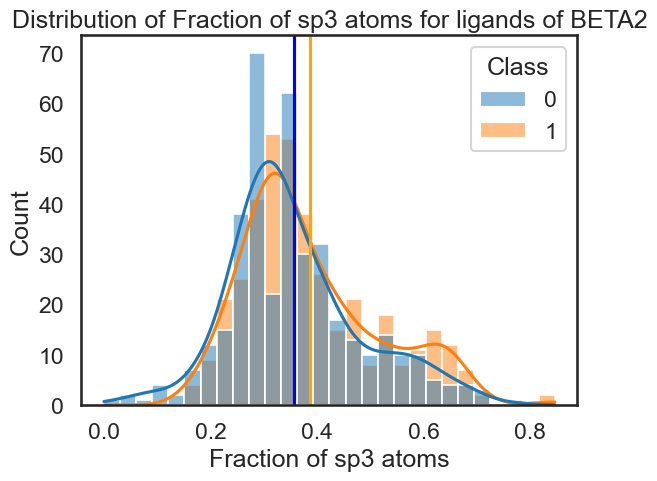

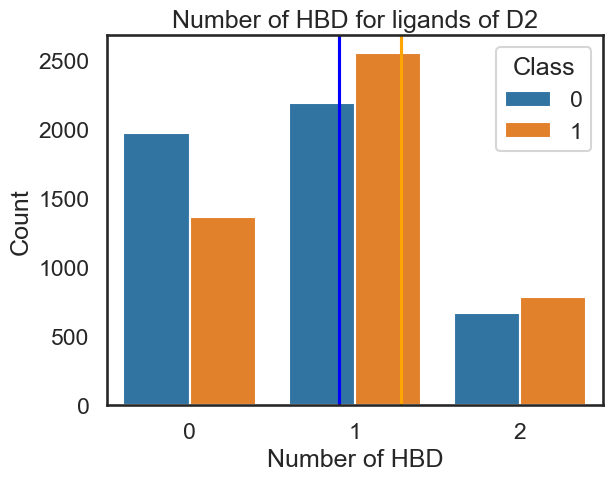

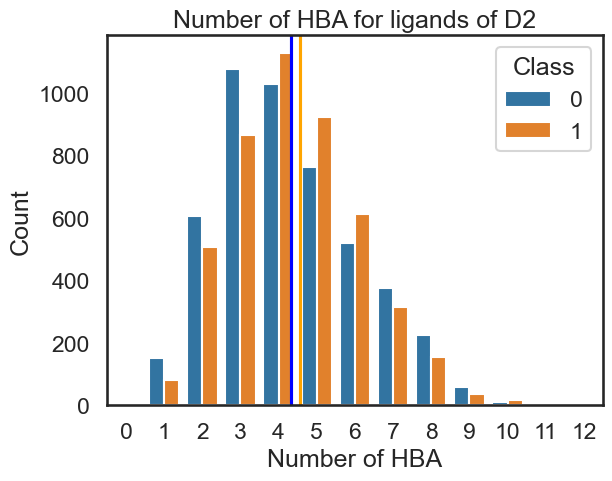

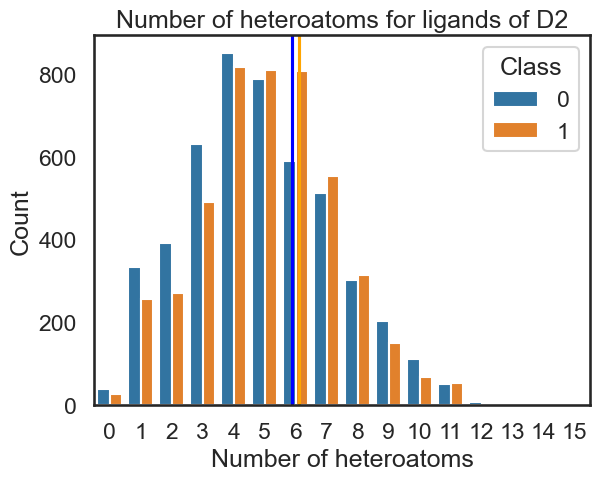

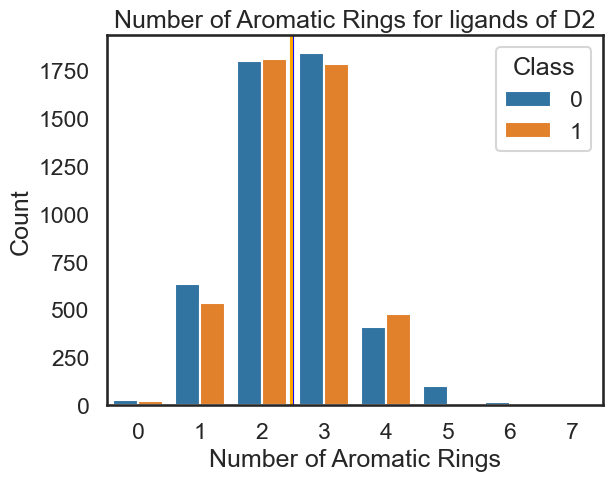

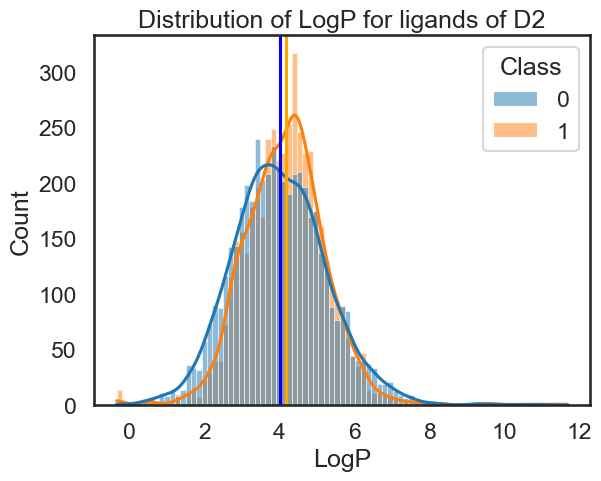

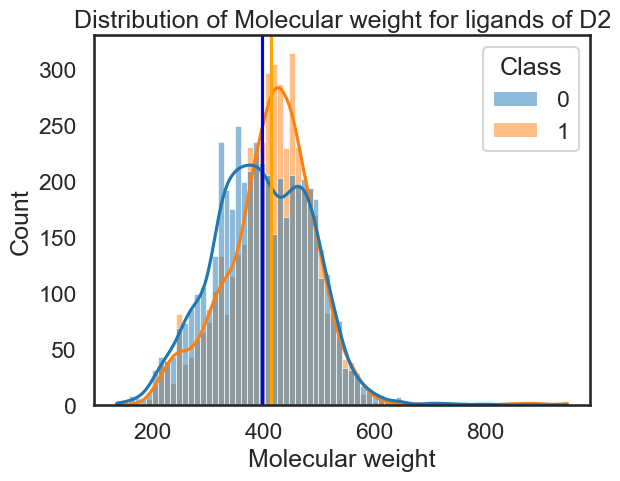

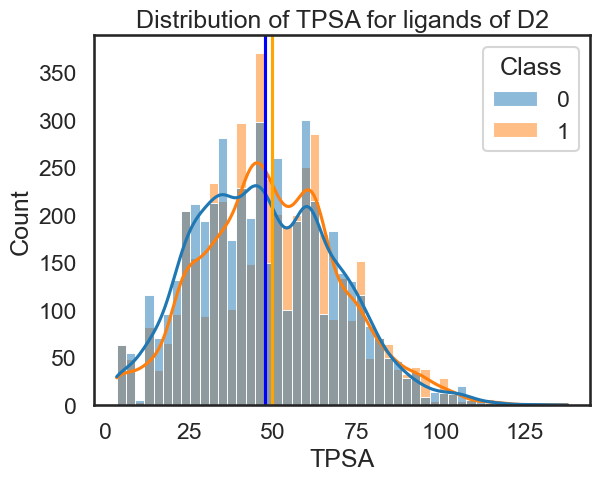

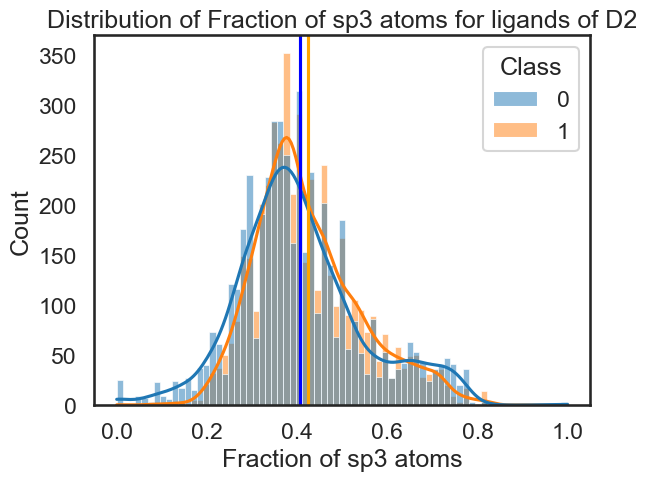

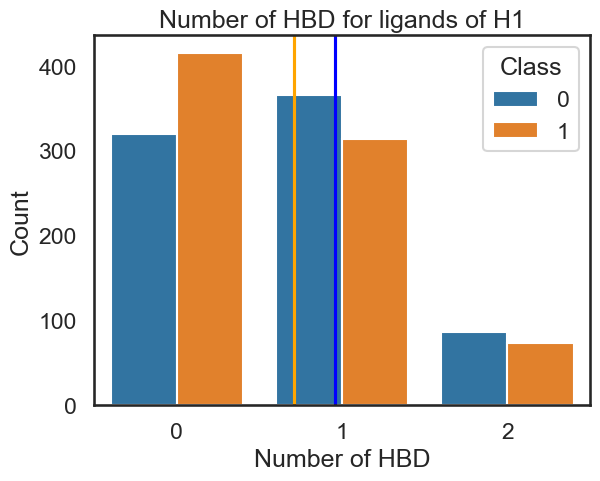

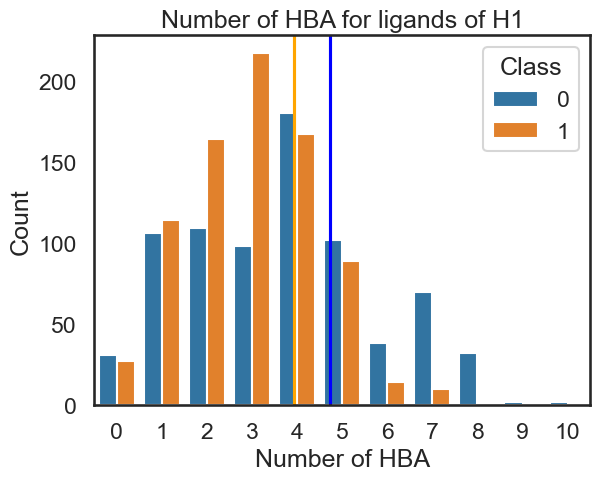

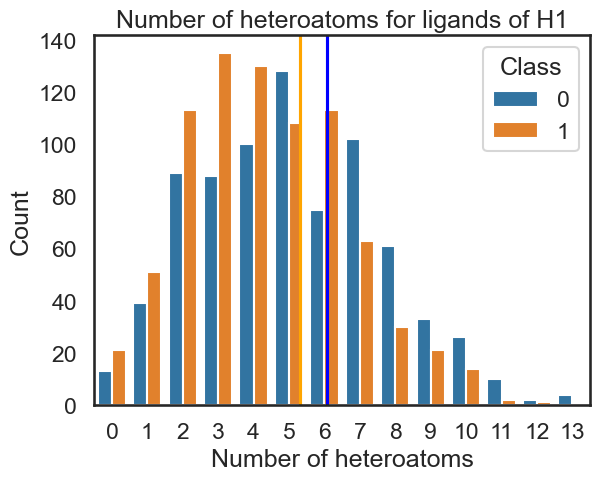

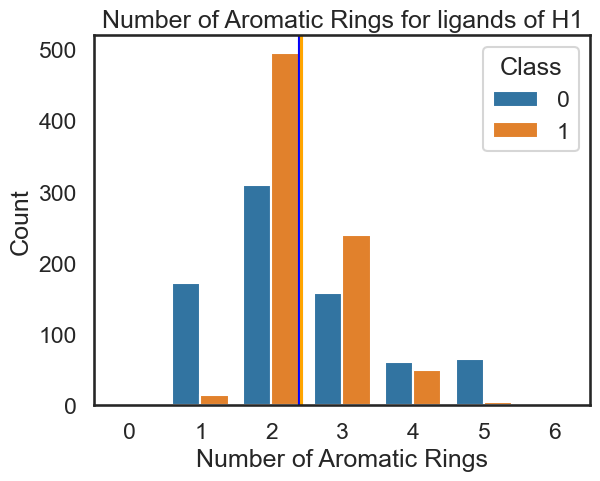

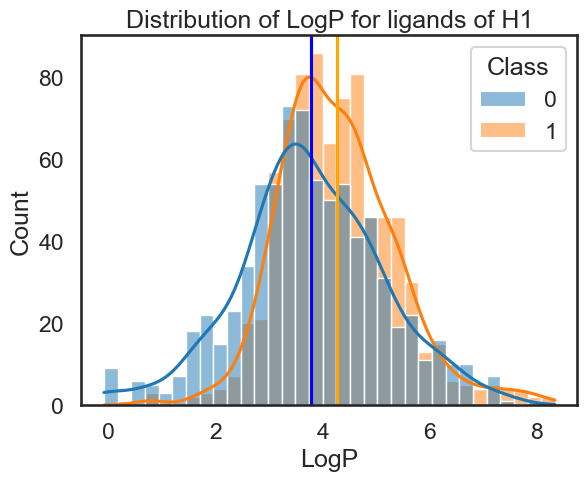

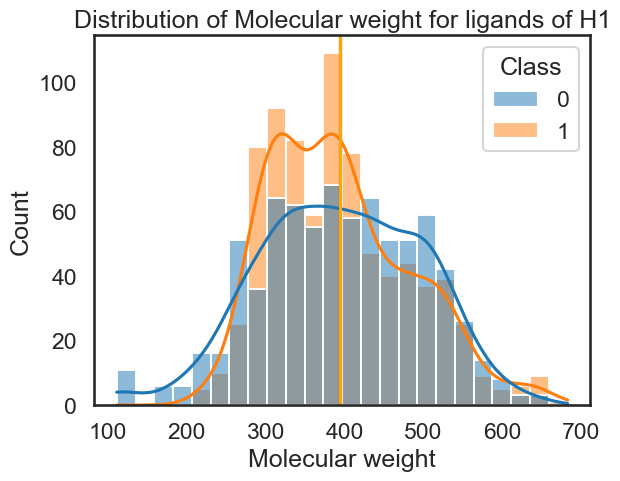

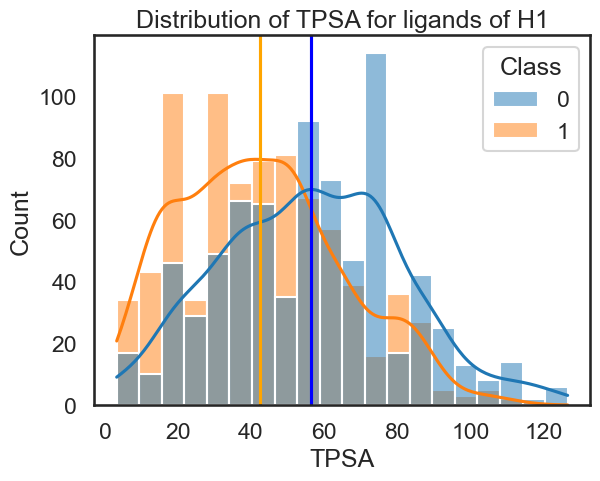

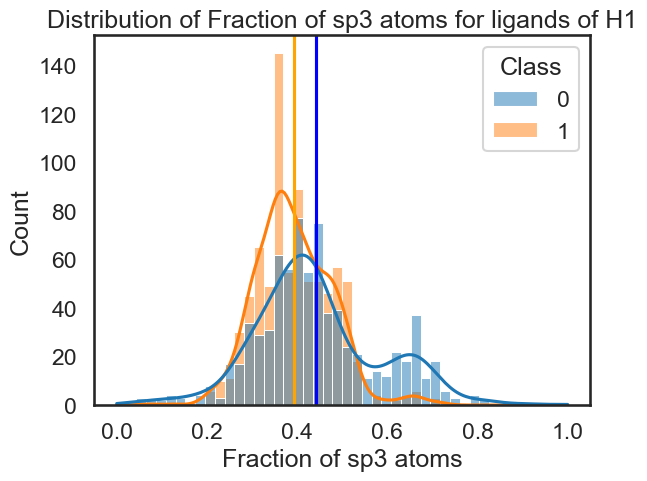

In [165]:
proteins = ['5ht1a', '5ht7', 'beta2', 'd2', 'h1']
for protein in proteins:
    data = DataAnalyser(protein, 'klek_balanced')
    for attribute in data.disc_properties + data.cont_properties:
        data.plot_distribution(attribute)

           KEYS                                SMARTS  5ht1a_percentage
3762  KLEK_3762                            CCN(CC)CCN             9.467
3756  KLEK_3756                             CCN(CC)CC             8.876
1591  KLEK_1591    [!#1]c1[cH][cH][cH]c([!#1])c1[!#1]             8.857
2427  KLEK_2427  [!#1]N1[CH2][CH2]N([!#1])[CH2][CH2]1             7.924
3920  KLEK_3920                             CN1CCNCC1             7.886
4852  KLEK_4852                           S(c1ccccc1)            -3.695
2854  KLEK_2854                           [!#1]S[!#1]            -4.133
4842  KLEK_4842                                     S            -4.171
3820  KLEK_3820                                    Cl            -4.419
1641  KLEK_1641      [!#1]c1[cH][cH]c([!#1])[cH][cH]1            -7.162


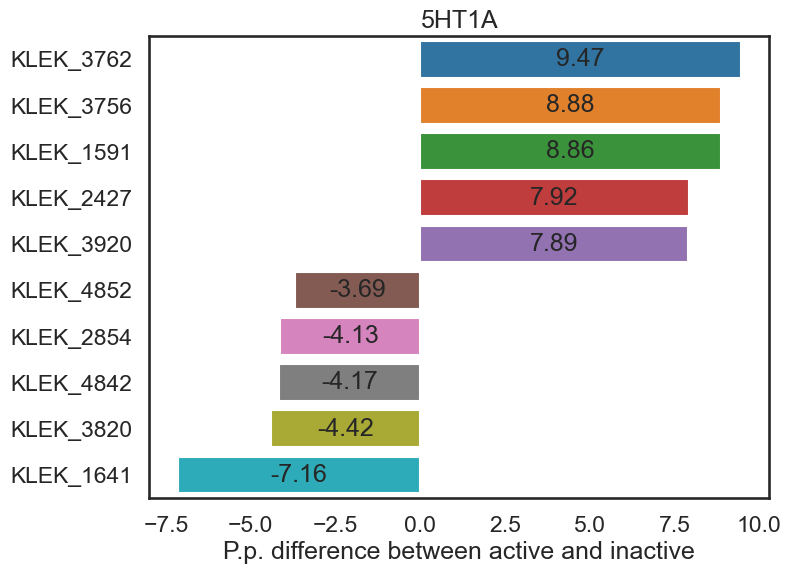

           KEYS                                  SMARTS  5ht7_percentage
3681  KLEK_3681                              CCc1ccccc1            7.729
3756  KLEK_3756                               CCN(CC)CC            6.952
437    KLEK_437  [!#1][CH2][CH2]N([CH2][!#1])[CH2][!#1]            6.919
619    KLEK_619       [!#1][CH2]N([CH2][!#1])[CH2][!#1]            6.851
3740  KLEK_3740                                CCCN(C)C            6.716
3743  KLEK_3743                                    CCCO           -2.261
3549  KLEK_3549                            Cc1ccc(N)cc1           -2.329
3780  KLEK_3780                                  CCNC=O           -2.329
3820  KLEK_3820                                      Cl           -2.700
3955  KLEK_3955                                      CO           -2.936


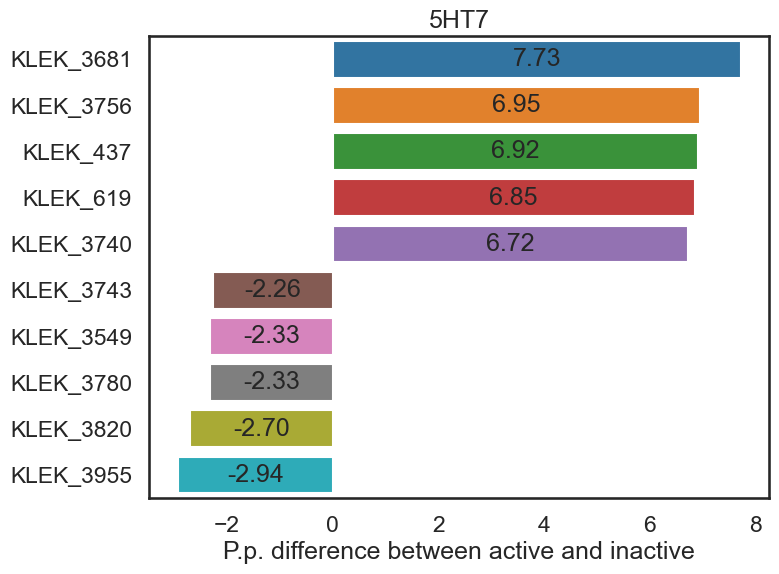

           KEYS                                SMARTS  beta2_percentage
646    KLEK_646                      [!#1][CH2]O[!#1]            17.519
3743  KLEK_3743                                  CCCO            15.729
3785  KLEK_3785                                CCNCCO            15.345
2546  KLEK_2546                           [!#1]O[!#1]            14.322
3407  KLEK_3407                                CC(C)O            14.066
3590  KLEK_3590                          Cc1cccc(O)c1            -8.440
4751  KLEK_4751                          Oc1cccc(O)c1            -9.207
3519  KLEK_3519                       Cc1cc(O)cc(O)c1            -9.719
1974  KLEK_1974    [!#1]c1[cH]c([OH])[cH]c([OH])[cH]1            -9.847
1925  KLEK_1925  [!#1]c1[cH]c([!#1])[cH]c([!#1])[cH]1           -10.102


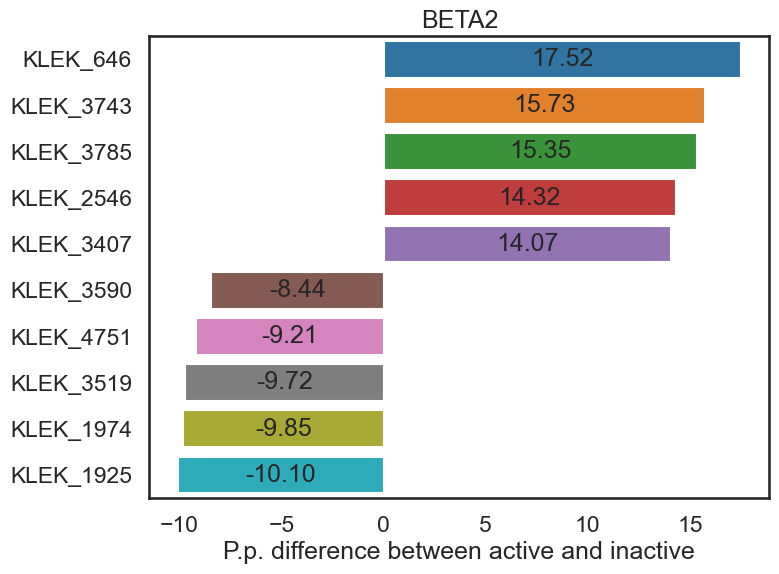

           KEYS                          SMARTS  d2_percentage
3762  KLEK_3762                      CCN(CC)CCN          9.518
3756  KLEK_3756                       CCN(CC)CC          8.417
343    KLEK_343       [!#1][CH2][CH2][CH2][!#1]          8.063
3918  KLEK_3918             CN1CCN(CC1)c2ccccc2          7.640
345    KLEK_345  [!#1][CH2][CH2][CH2][CH2][!#1]          7.414
457    KLEK_457           [!#1][CH2][CH2]S[!#1]         -3.382
4018  KLEK_4018                              CS         -3.471
1563  KLEK_1563    [!#1]c1[cH][cH][cH][cH][cH]1         -3.707
3368  KLEK_3368                          CC(C)C         -3.746
2217  KLEK_2217        [!#1]c1nnc([!#1])n1[!#1]         -3.766


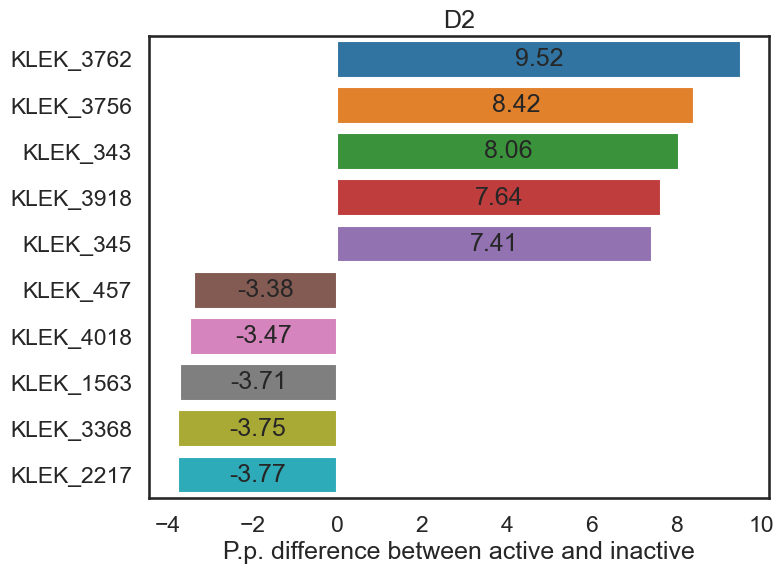

           KEYS                                 SMARTS  h1_percentage
1565  KLEK_1565         [!#1]c1[cH][cH][cH][cH]c1[!#1]         17.327
2258  KLEK_2258                                [!#1]Cl         13.838
3868  KLEK_3868                             Clc1ccccc1         13.365
3820  KLEK_3820                                     Cl         13.365
3156  KLEK_3156                               C1CCNCC1          9.758
374    KLEK_374             [!#1][CH2][CH2][CH2]O[!#1]         -8.102
1145  KLEK_1145                             [!#1][NH2]         -8.161
2710  KLEK_2710      [!#1]Oc1[cH][cH]c([!#1])[cH][cH]1         -8.338
1451  KLEK_1451  [!#1]C(=O)c1[cH][cH]c([!#1])[cH][cH]1         -9.048
343    KLEK_343              [!#1][CH2][CH2][CH2][!#1]        -14.370


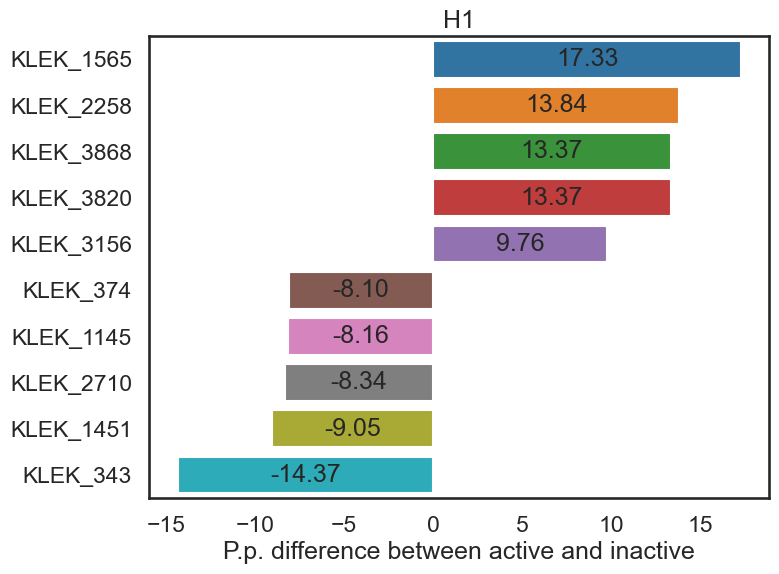

In [79]:
FP = FPAnalyser()
FP.plot_similarity()